In [10]:
from main import *
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster
from sklearn import ensemble
from sklearn import neighbors
import numpy as np

data = test_umass()
micr_on = data['WashingMachine [kW]']['off']
df = pd.DataFrame(micr_on)
df.head()


DEBUG:root:The number of device events from processed file: {'Microwave [kW]': 1231, 'WashingMachine [kW]': 289}
DEBUG:root:The number of context events from processed file: {'apparentTemperature#NUM': 8764, 'humidity#NUM': 7703, 'summary#CAT': 2578}
DEBUG:root:Verifying the length of the events for each context matches


,apparentTemperature#NUM,humidity#NUM,summary#CAT,sec_of_day#NUM,day_of_week#CAT
0,27.98,0.64,Clear,0,4
1,11.68,0.50,Clear,32460,5
2,11.07,0.49,Cloundy,38040,5
3,11.29,0.47,Clear,42720,5
4,16.73,0.40,Clear,50640,5


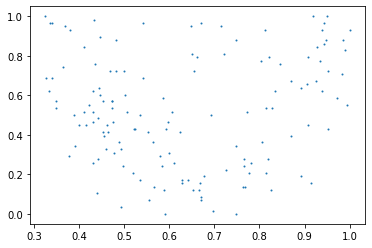

The number of events 140


In [12]:
fig, ax = plt.subplots()
data_np = df[['sec_of_day#NUM', 'humidity#NUM']].to_numpy()
data_np = sklearn.preprocessing.MinMaxScaler().fit_transform(data_np)

# outliers = ensemble.IsolationForest(random_state=0).fit_predict(data_np)

outliers = neighbors.LocalOutlierFactor().fit_predict(data_np)

data_np = data_np[outliers!=-1, :]
plt.scatter(data_np[:,0],data_np[:,1], s=1)
plt.show()
print('The number of events {}'.format(len(data_np)))

The size for kclass -1 is 140


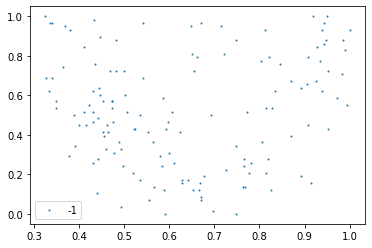

In [13]:

# clust = cluster.AgglomerativeClustering(n_clusters=3).fit(data_np)
clust = cluster.DBSCAN(min_samples=10, eps = 0.03).fit(data_np)
label = clust.labels_

u_labels = np.unique(label)
for i in u_labels:
    # if i == -1:
    #     continue
    print("The size for kclass {} is {}".format(i, len(data_np[label==i])))
    plt.scatter(data_np[label == i , 0] , data_np[label == i , 1] , label = i, s=1)
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.44430855719438667
For n_clusters = 3 The average silhouette_score is : 0.5055953791734422
For n_clusters = 4 The average silhouette_score is : 0.44272295889714736
For n_clusters = 5 The average silhouette_score is : 0.4229422106374292
For n_clusters = 6 The average silhouette_score is : 0.4192278559869682


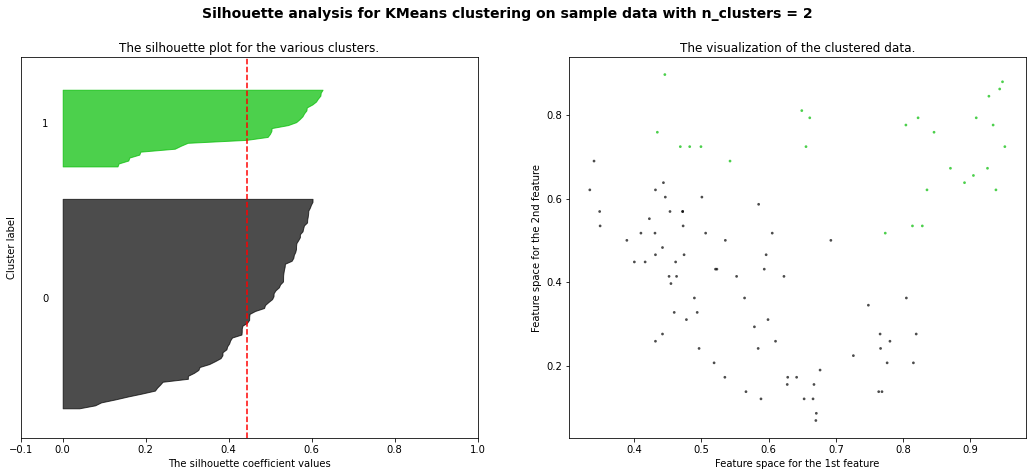

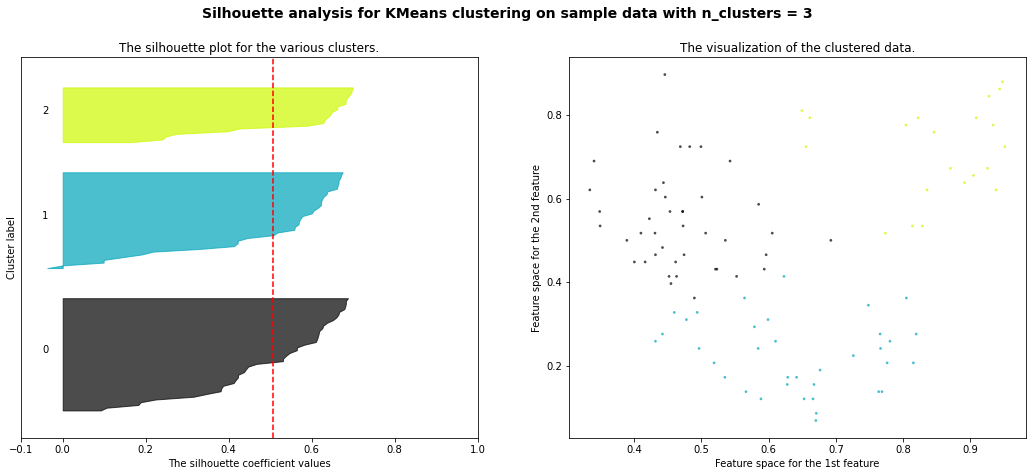

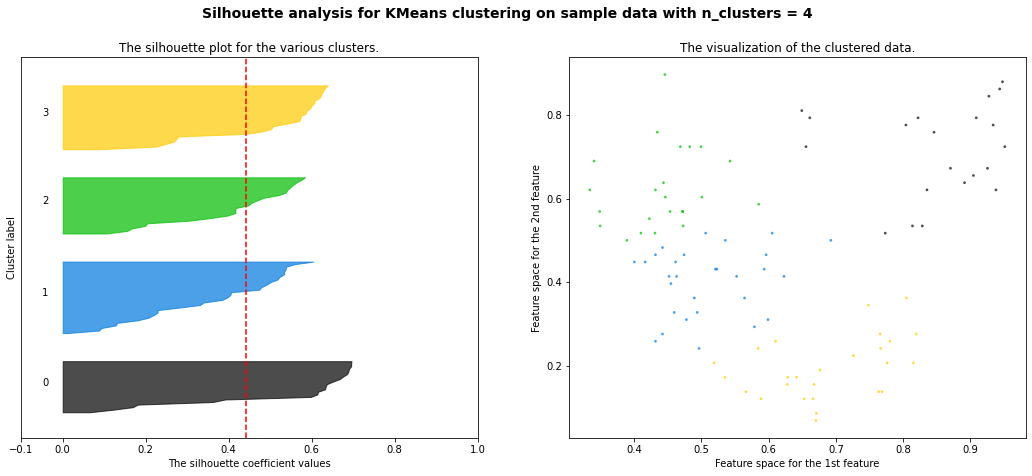

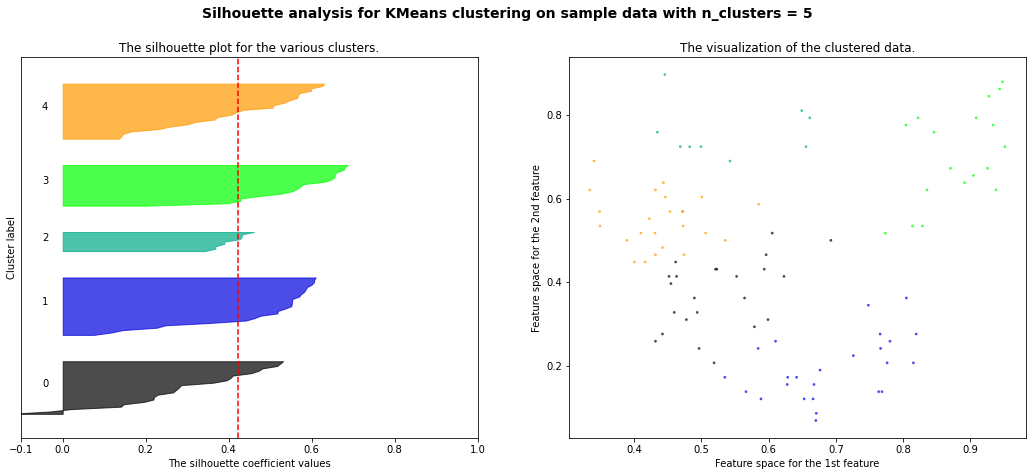

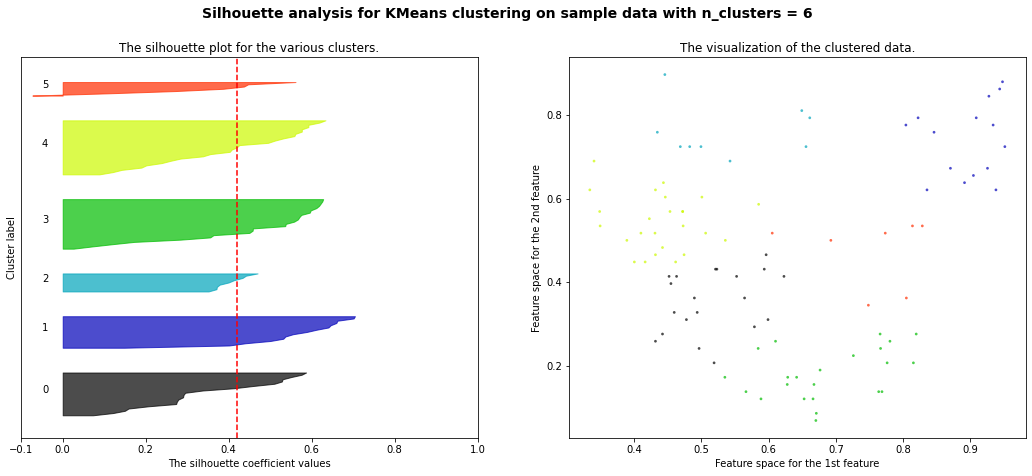

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = data_np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()